# 9. ETF 데이터 분석 및 시각화

## 9.1 요약

### 9.1.1 `seaborn`을 활용한 데이터 시각화

- 수치형 데이터 시각화
  - `barplot`, `boxplot`, `violinplot` (`seaborn`)  
  
  
- 서브 플롯 시각화
  - `subplots` (`matplotlib`)
  - `PairGrid` (`seaborn`)
    - 여러 변수를 시각화 할 때 사용
  - `FacetGrid` (`seaborn`)
    - 개별 변수에 있는 값들을 여러 개의 컬럼 또는 행으로 나눠서 시각화
    - `catplot` : categorical, 범주형 데이터 시각화 (kind: `count`, `bar`, `box`, `boxen`, `violin`)
    - `replot` : relational, 연속된 수치 데이터 시각화 (kind: `scatter`, `line`)
    - `displot` : distribution, 수치에 대한 분포 시각화 (kind: `histplot`, `kdeplot`, `ecdfplot`, `rugplot`)
    
<img src="./img/09_01.jpg" style="width: 450px; margin-left: 25px;" />

- 참고 : [seaborn 튜토리얼](https://seaborn.pydata.org/tutorial.html)

<br>

## 9.2 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn 버전 0.11.0 이상 확인
sns.__version__

'0.11.1'

In [3]:
# pandas 버전 1.0.0 이상 확인
pd.__version__ 

'1.1.5'

<br>

## 9.3 시각화를 위한 한글 폰트 설정

In [4]:
# 설정 가능한 그래프 스타일 확인
print(plt.style.available)

# 그래프 스타일 설정 (seaborn-whitegrid)
plt.style.use('seaborn-whitegrid') # seaborn 스타일 설정은 폰트 설정 이전에 실행해야 한다.

# 한글 폰트 설정
from matplotlib import font_manager, rc

# 일반 폰트 설정
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

# 마이너스 폰트 설정
rc('axes', unicode_minus=False)

# retina display 적용 (선명하게)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


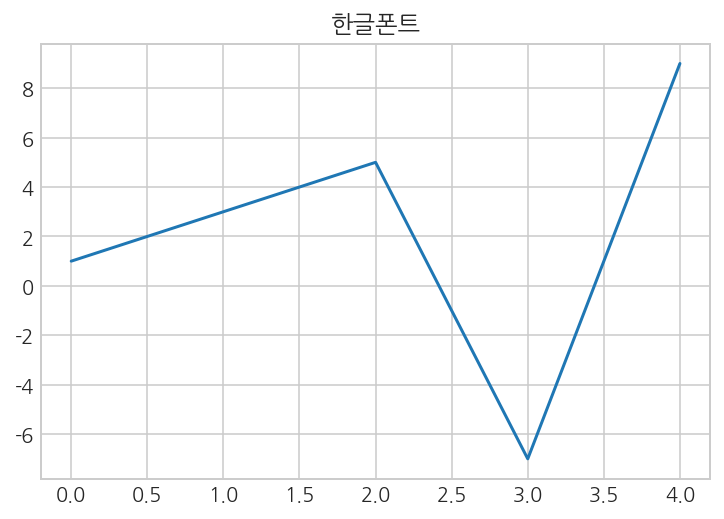

In [5]:
# 설정 확인
g = pd.Series([1, 3, 5, -7, 9]).plot(title='한글폰트')

<br>

## 9.4 데이터 로드

In [6]:
df = pd.read_csv('etf_2021-02-03.csv', dtype={'종목코드': np.object})
df.shape

(469, 17)

In [7]:
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,069500,1,KODEX 200,43130,2,355,0.83,43214.0,39.9522,8521906,366352,62625,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,42970,2,360,0.84,43038.0,39.9710,1650818,70651,31347,국내 시장지수,TIGER,False,False,False
2,252670,3,KODEX 200선물인버스2X,2055,5,-35,-1.67,2051.0,-51.2821,642008913,1329284,20227,국내 파생,KODEX,True,False,False
3,122630,3,KODEX 레버리지,27825,2,475,1.74,28022.0,92.0646,46157932,1275107,19088,국내 파생,KODEX,False,True,False
4,102780,2,KODEX 삼성그룹,10530,2,70,0.67,10545.0,37.6315,612363,6415,18522,국내 업종/테마,KODEX,False,False,False


In [8]:
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
464,285010,2,KBSTAR 200중공업,8485,2,20,0.24,8481.0,16.7586,282,2,22,국내 업종/테마,KBSTAR,False,False,False
465,334700,5,KBSTAR 팔라듐선물인버스(H),5495,2,30,0.55,NaN,-1.5316,1816,9,22,원자재,KBSTAR,True,False,True
466,267500,4,KBSTAR 미국장기국채선물인버스2X(합성 H),6030,2,30,0.50,NaN,4.8951,4614,27,18,해외 주식,KBSTAR,True,False,True
467,285020,2,KBSTAR 200철강소재,7245,2,25,0.35,7246.0,25.5652,3443,24,17,국내 업종/테마,KBSTAR,False,False,False
468,287320,2,KBSTAR 200산업재,10750,2,220,2.09,10776.0,33.1226,47,0,13,국내 업종/테마,KBSTAR,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        469 non-null    object 
 1   탭코드         469 non-null    int64  
 2   종목명         469 non-null    object 
 3   현재가         469 non-null    int64  
 4   등락구분        469 non-null    int64  
 5   전일비         469 non-null    int64  
 6   등락률         469 non-null    float64
 7   순자산가치(NAV)  341 non-null    float64
 8   3개월수익률      452 non-null    float64
 9   거래량         469 non-null    int64  
 10  거래대금(백만)    469 non-null    int64  
 11  시가총액(억)     469 non-null    int64  
 12  유형          469 non-null    object 
 13  브랜드         469 non-null    object 
 14  인버스         469 non-null    bool   
 15  레버리지        469 non-null    bool   
 16  환헤지         469 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 52.8+ KB


- 순자산가치(NAV)
  - "ETF의 기초지수가 해외지수인 경우, 해당 ETF의 NAV가 제공되지 않습니다."  
  
  
- 3개월수익률
  - 상장된 지 3개월 미만의 ETF 종목에 대해서는 3개월수익률 데이터가 존재하지 않는다.

<br>

## 9.5 결측치 확인

In [10]:
df.notnull() # False: 결측치

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
465,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
466,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
467,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [11]:
df.isnull() # True: 결측치

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
465,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
466,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
print(True + True + False)
print(True == 1)
print(False == 0)

2
True
True


<br>

- `isnull()` 메서드의 반환값이 `True`(=`1`)인 값을 모두 더하여 결측치 갯수를 구할 수 있다.

<br>

### 9.5.1 컬럼별 결측치 확인

In [13]:
df.isnull().sum()

종목코드            0
탭코드             0
종목명             0
현재가             0
등락구분            0
전일비             0
등락률             0
순자산가치(NAV)    128
3개월수익률         17
거래량             0
거래대금(백만)        0
시가총액(억)         0
유형              0
브랜드             0
인버스             0
레버리지            0
환헤지             0
dtype: int64

<br>

### 9.5.2 결측치 비율 확인

In [14]:
df.isnull().mean() * 100

종목코드           0.000000
탭코드            0.000000
종목명            0.000000
현재가            0.000000
등락구분           0.000000
전일비            0.000000
등락률            0.000000
순자산가치(NAV)    27.292111
3개월수익률         3.624733
거래량            0.000000
거래대금(백만)       0.000000
시가총액(억)        0.000000
유형             0.000000
브랜드            0.000000
인버스            0.000000
레버리지           0.000000
환헤지            0.000000
dtype: float64

<br>

### 9.5.3 heatmap을 통한 결측치 시각화

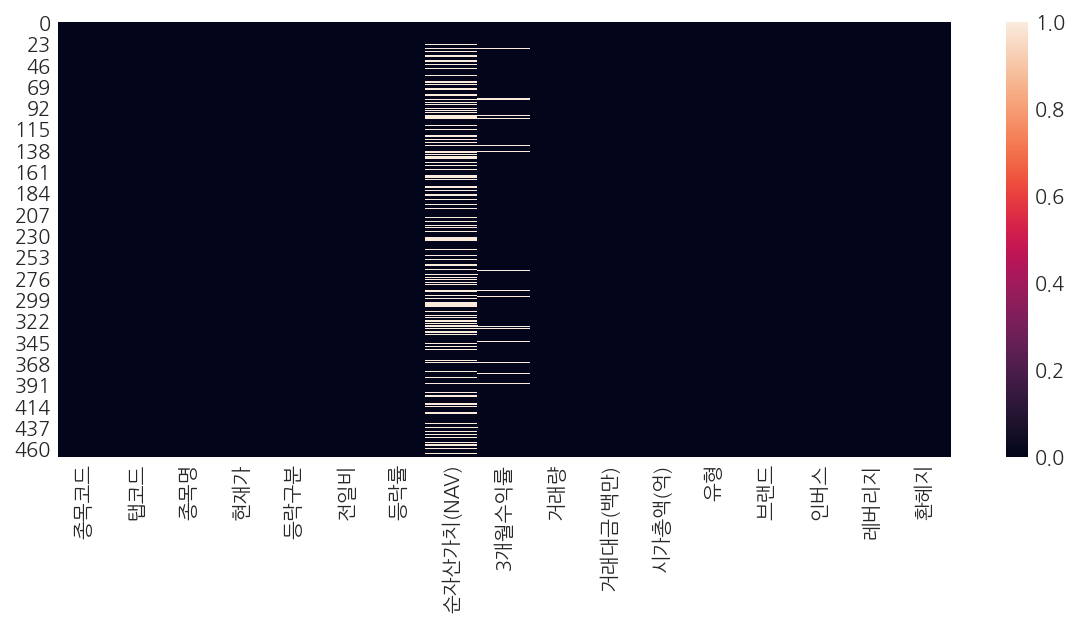

In [15]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull())
plt.show()

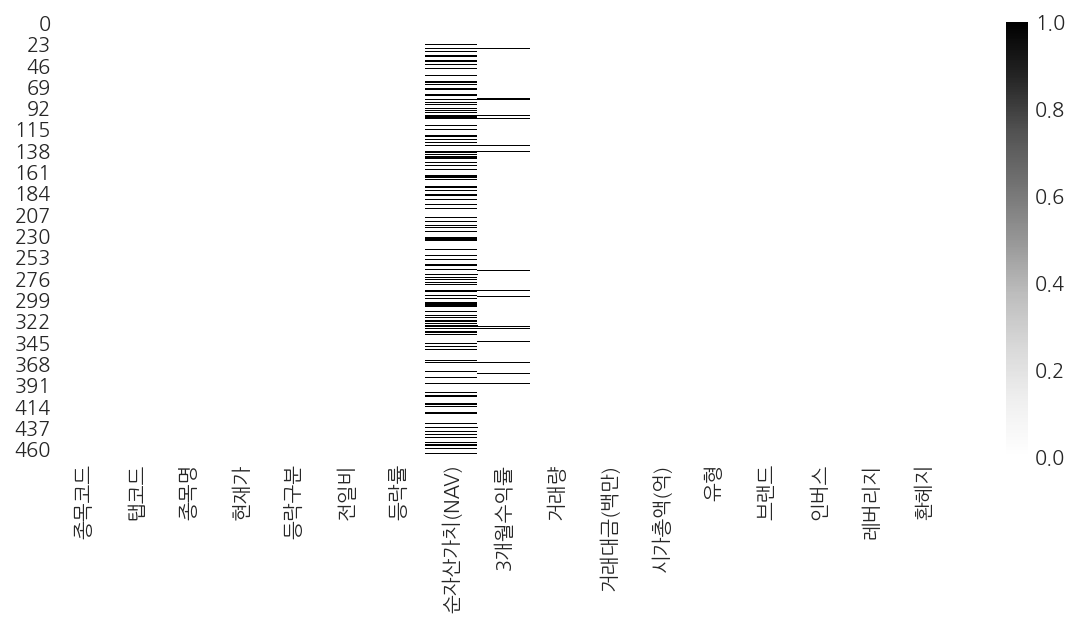

In [16]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cmap='Greys')
plt.show()

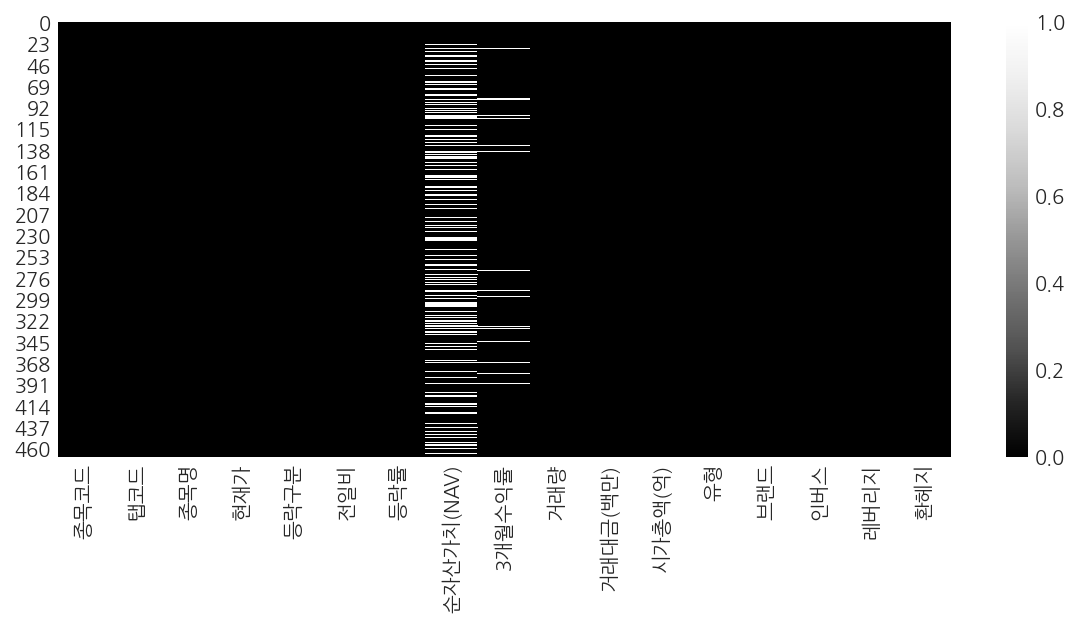

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cmap='Greys_r')
plt.show()

<br>

## 9.6 범주형 데이터의 빈도수

### 9.6.1 범주형 변수 찾기

수치 데이터에 대한 기술 통계값 확인

In [18]:
df.describe()

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,469.000000,469.000000,469.000000,469.000000,469.000000,341.000000,452.000000,4.690000e+02,4.690000e+02,469.000000
mean,3.264392,23528.560768,2.590618,131.300640,0.695416,26442.331378,22.009150,1.998222e+06,1.069966e+04,1228.149254
std,1.842759,25493.804432,1.154144,202.981551,1.069064,28052.290006,24.255505,3.020403e+07,9.039377e+04,4215.857920
min,1.000000,2045.000000,2.000000,-445.000000,-6.930000,2037.000000,-51.348200,0.000000e+00,0.000000e+00,13.000000
25%,2.000000,10750.000000,2.000000,10.000000,0.010000,10962.000000,5.462850,5.580000e+02,9.000000e+00,80.000000
50%,2.000000,14065.000000,2.000000,90.000000,0.680000,15127.000000,21.885050,6.221000e+03,9.400000e+01,155.000000
75%,4.000000,21745.000000,2.000000,200.000000,1.230000,28133.000000,37.774425,4.471000e+04,6.090000e+02,599.000000
max,7.000000,133650.000000,5.000000,1335.000000,7.460000,133607.000000,153.714200,6.420089e+08,1.329284e+06,62625.000000


<br>

`include` 속성을 사용하여 object type 변수만 확인

In [19]:
df.describe(include=np.object)

,종목코드,종목명,유형,브랜드
count,469,469,469,469
unique,469,469,7,15
top,243880,KODEX MSCI모멘텀,국내 업종/테마,TIGER
freq,1,1,174,128


<br>

`exclude` 속성을 사용하여 숫자형(number) type 변수를 제외한 나머지 변수 확인
- boolean type의 변수도 출력됨

In [20]:
df.describe(exclude=np.number) # 

,종목코드,종목명,유형,브랜드,인버스,레버리지,환헤지
count,469,469,469,469,469,469,469
unique,469,469,7,15,2,2,2
top,243880,KODEX MSCI모멘텀,국내 업종/테마,TIGER,False,False,False
freq,1,1,174,128,425,435,405


<br>

`nunique()` : 중복을 제외한 데이터의 갯수 출력
- object type이 아니더라도 `nunique()` 값이 작다면 범주형 변수에 해당할 수도 있다.
- *탭코드*, *등락구분*도 범주형 변수에 해당한다는 것을 알 수 있음

In [21]:
df.nunique()

종목코드          469
탭코드             7
종목명           469
현재가           445
등락구분            3
전일비           134
등락률           238
순자산가치(NAV)    339
3개월수익률        452
거래량           434
거래대금(백만)      281
시가총액(억)       313
유형              7
브랜드            15
인버스             2
레버리지            2
환헤지             2
dtype: int64

<br>

### 9.6.2 ETF 상품 유형별 빈도수 (한 개의 변수)

pandas의 `plot.barh()` 활용

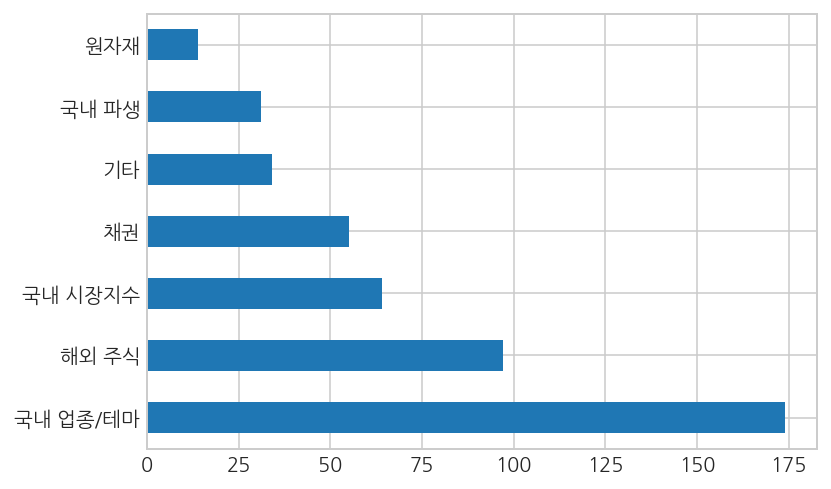

In [22]:
b = df['유형'].value_counts().plot.barh()

<br>

seaborn의 `countplot()` 활용

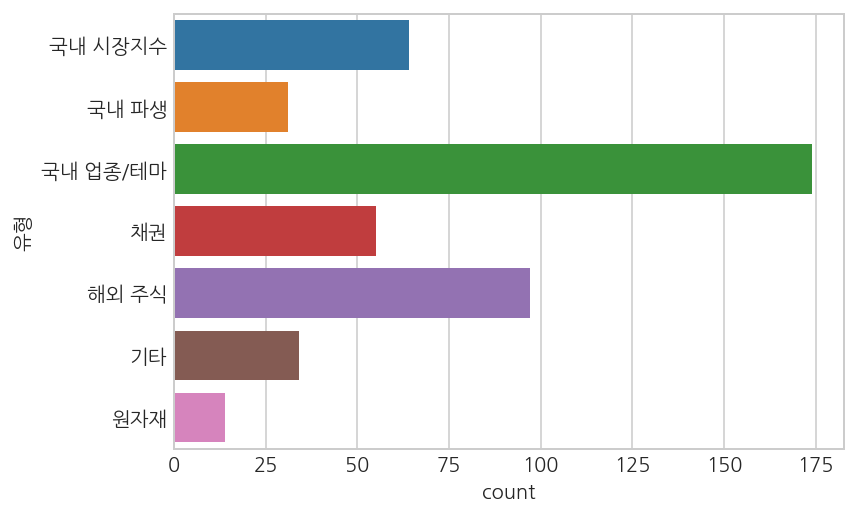

In [23]:
sns.countplot(data=df, y='유형')
plt.show()

<br>

빈도수 기준 정렬

- `value_counts()` 메서드를 수행하면 빈도수 기준으로 정렬된다.
- `value_counts().index`를 `countplot()`의 `order` 속성에 지정해주면 빈도수 기준으로 정렬할 수 있다.

In [24]:
df['유형'].value_counts().index

Index(['국내 업종/테마', '해외 주식', '국내 시장지수', '채권', '기타', '국내 파생', '원자재'], dtype='object')

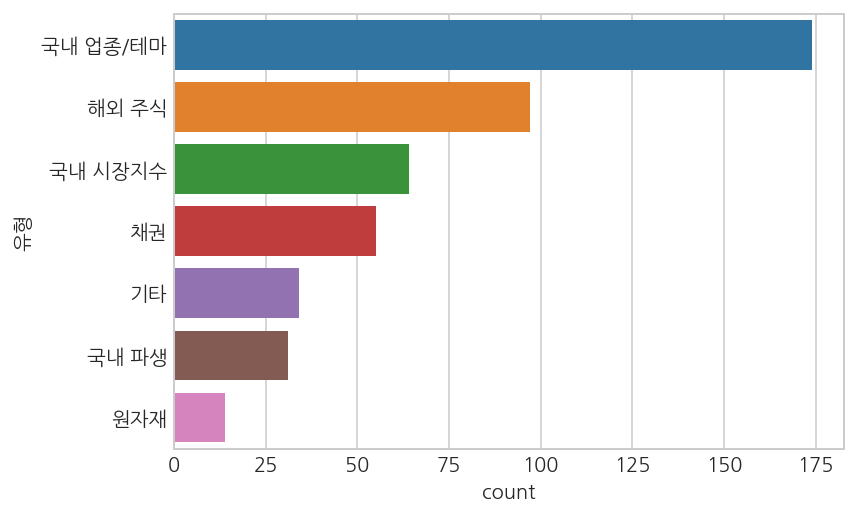

In [25]:
sns.countplot(data=df, y='유형', order=df['유형'].value_counts().index)
plt.show()

<br>

유형 이름 가나다순으로 정렬

- `data` 속성에 `df.sort_values('유형')`을 지정

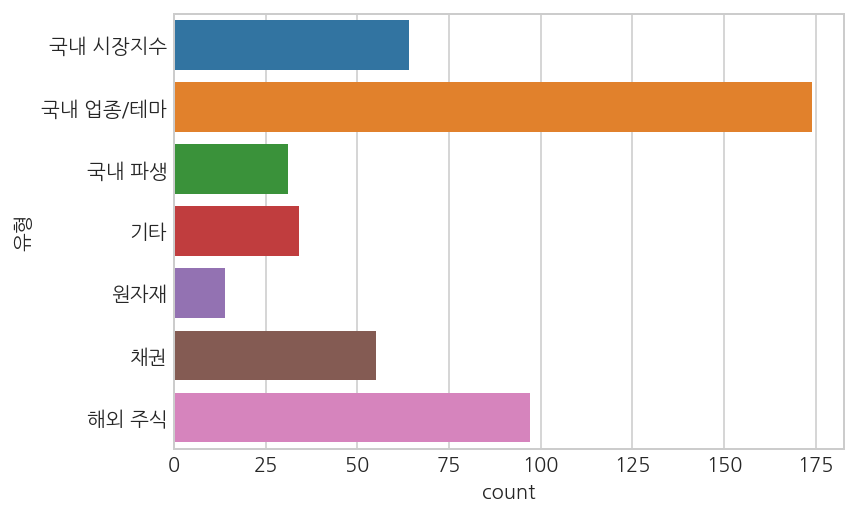

In [26]:
sns.countplot(data=df.sort_values('유형'), y='유형')
plt.show()

<br>

비율 확인

In [28]:
df['유형'].value_counts(normalize=True) * 100

국내 업종/테마    37.100213
해외 주식       20.682303
국내 시장지수     13.646055
채권          11.727079
기타           7.249467
국내 파생        6.609808
원자재          2.985075
Name: 유형, dtype: float64